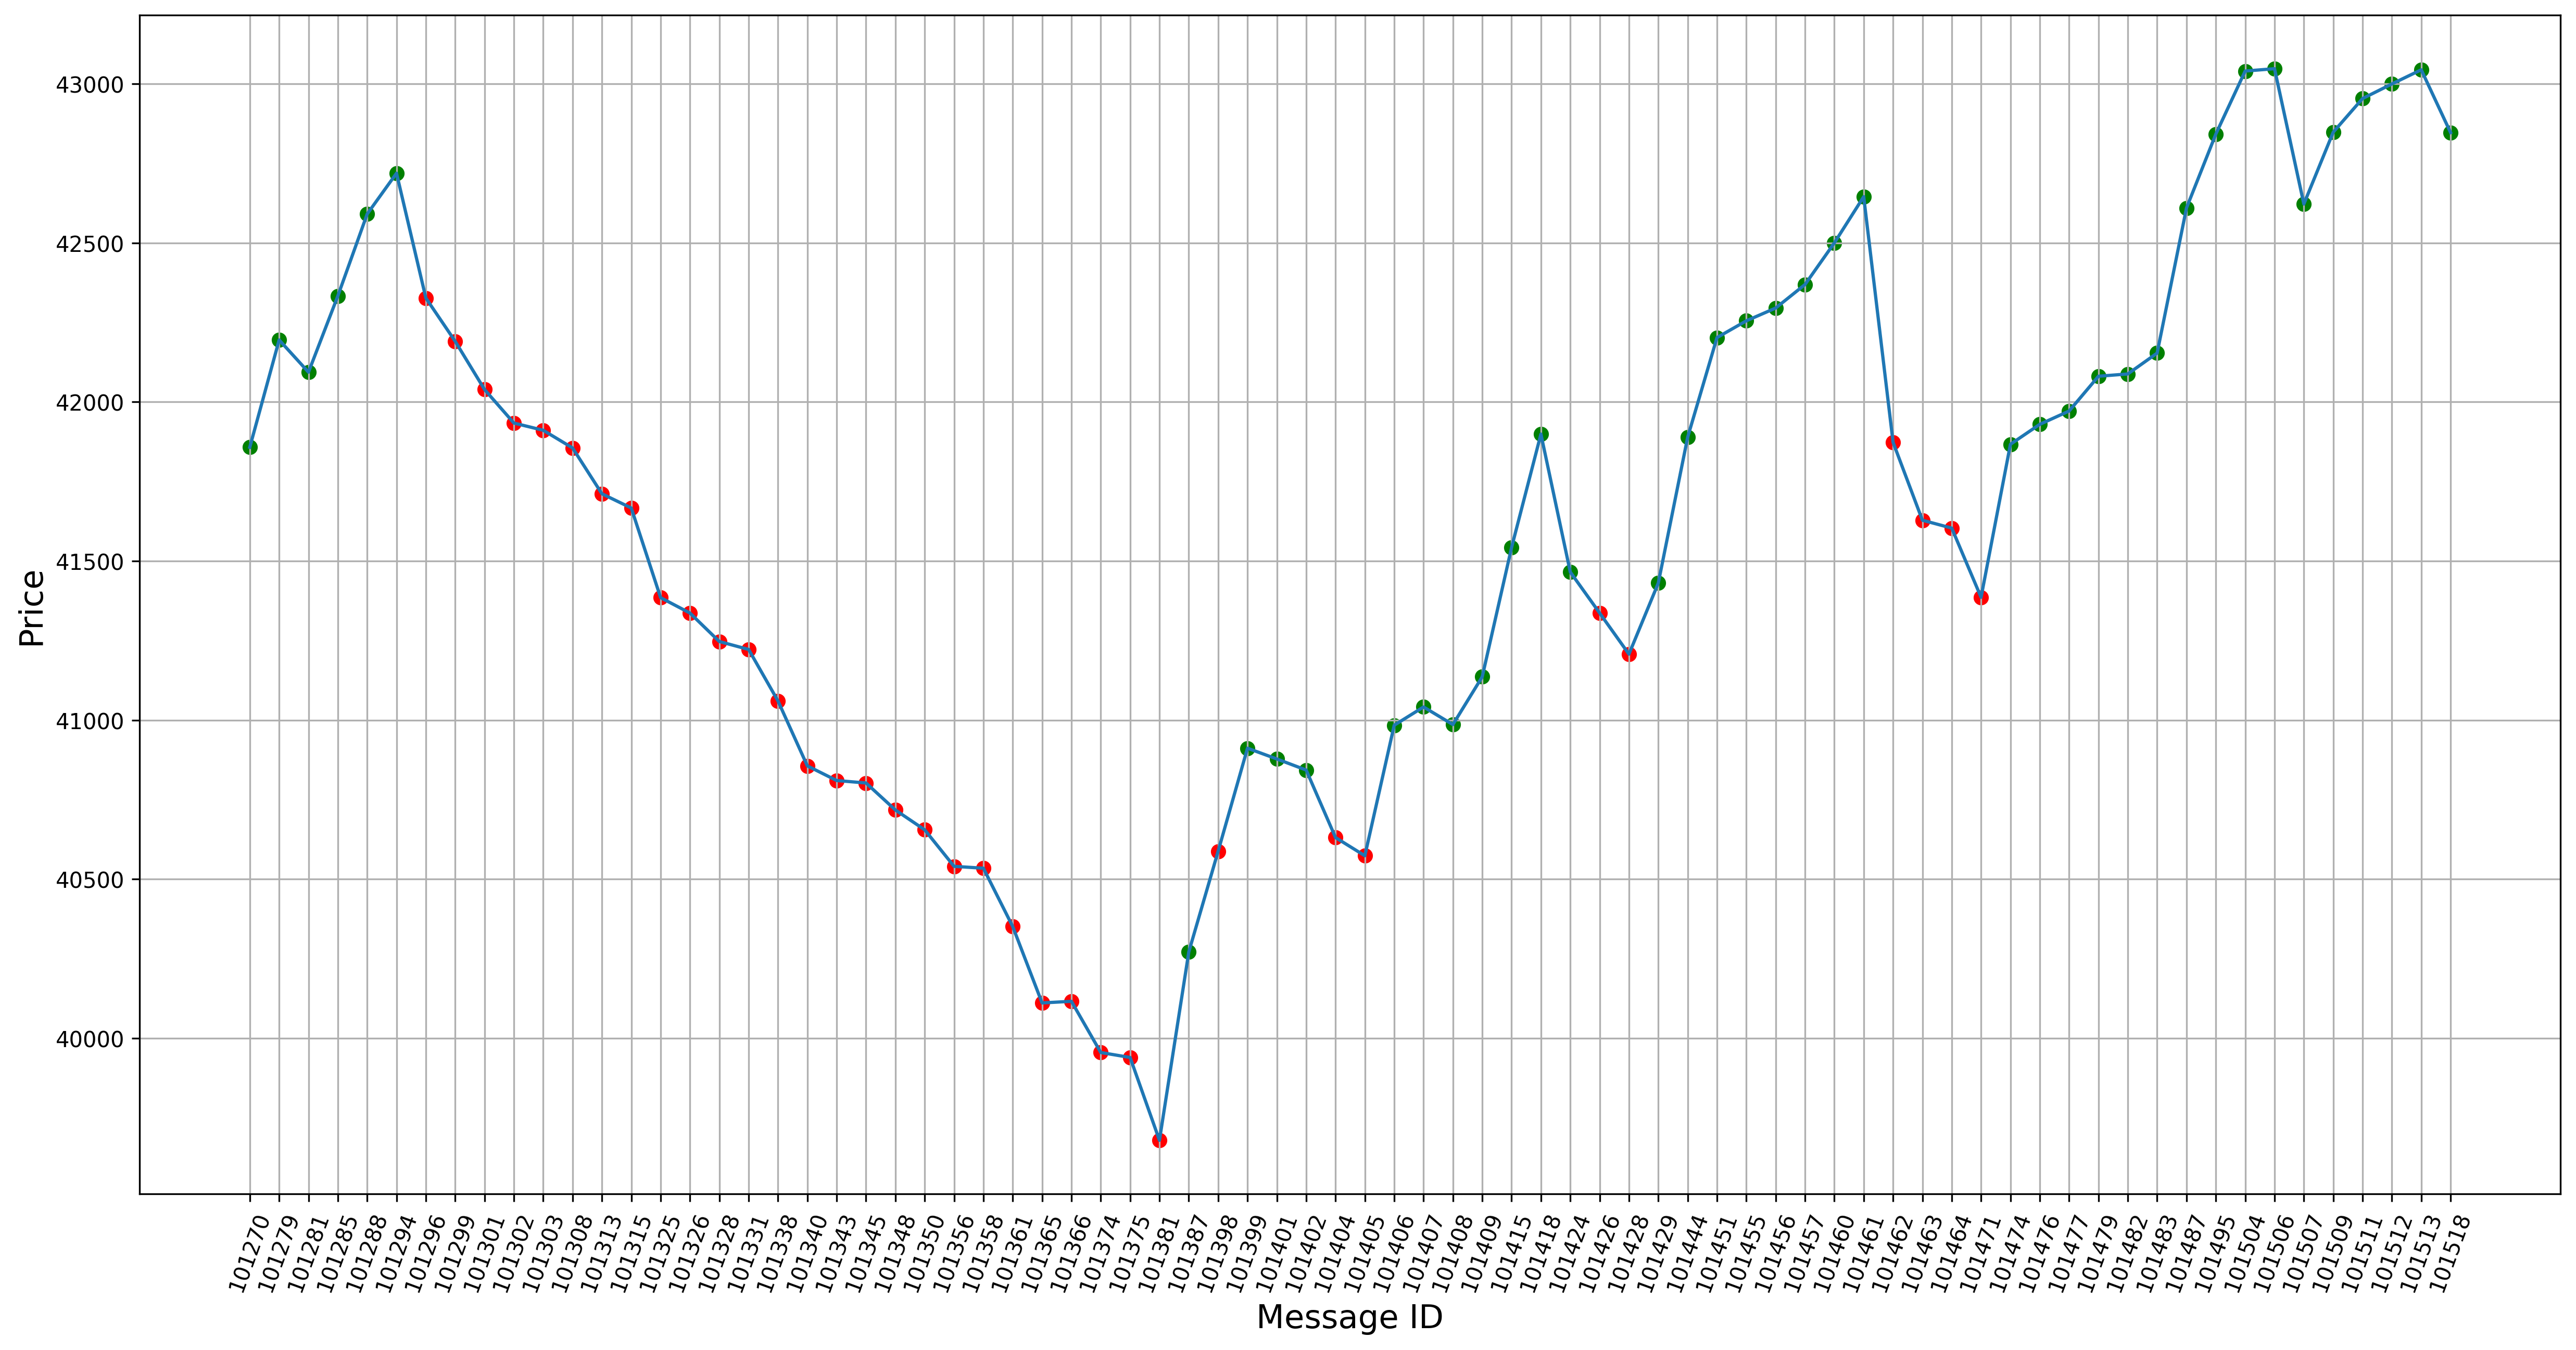

In [100]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

f = open('result.json')
data = json.load(f)

btcitemslist = list()
shortlong_list = list()
BTCshort_list = list()
BTCshortunique_list = list()
BTCshortprice_list = list()
BTClong_list = list()
BTClongunique_list = list()
BTClongprice_list = list()
combinedshortlong_list = list()
combinedunique_list = list()
combinedshortlongprice_list = list()
messages_list = list(data["messages"])

for message in messages_list:
    if message["type"] == "service":
        messages_list.remove(message)

for message in messages_list:    
    if message["text"][1]["text"] == "#BTC":
        btcitemslist.append(message)

# using $# is such that the splitting later on would work
for message in btcitemslist:
    shortlong_list.append(message["text"][-1] + " $#"  + str(message["id"]))
    
#list of shorts
for message in shortlong_list:
    new_message = message.split(" ")
    if new_message[2] == "Short:" :
        BTCshort_list.append(message)
        
for message in BTCshort_list:
    short_split = message.split("$")
    BTCshortprice_list.append(float(short_split[2]))
    
# making short unique lsit        
for message in BTCshort_list:
    new_message = message.split("#")
    BTCshortunique_list.append(new_message[1])

#list of longs
for message in shortlong_list:
    new_message = message.split(" ")
    if new_message[2] == "Long:" :
        BTClong_list.append(message)

# making long unique lsit        
for message in BTClong_list:
    new_message = message.split("#")
    BTClongunique_list.append(new_message[1])

for message in BTClong_list:
    long_split = message.split("$")
    BTClongprice_list.append(float(long_split[2]))

#combined lists
for message in shortlong_list:
    new_message = message.split(" ")
    combinedshortlong_list.append(new_message[2])
    
for message in shortlong_list:
    new_message = message.split("#")
    combinedunique_list.append(new_message[1])
    
for message in shortlong_list:
    new_message = message.split("$")
    combinedshortlongprice_list.append(float(new_message[2]))
    
'''
df1 = pd.DataFrame(list(zip(combinedshortlongprice_list, combinedshortlong_list)), columns = ["Price", "Long/Short"])
df2 = pd.DataFrame(list(zip(BTCshortprice_list, BTCshort_list)), columns = ["Short Price", "Short"])
'''
figure(figsize=(20, 10), dpi = 300)
plt.xticks(rotation= 70)
plt.xlabel("Message ID", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.grid(visible = True)
plt.plot(combinedunique_list, combinedshortlongprice_list)
plt.scatter(BTClongunique_list, BTClongprice_list, color = "red")
plt.scatter(BTCshortunique_list, BTCshortprice_list, color = "green")